In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('all_anonymized_2015_11_2017_03.csv')

In [3]:
data.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'body_type', 'color_slug', 'stk_year', 'transmission',
       'door_count', 'seat_count', 'fuel_type', 'date_created',
       'date_last_seen', 'price_eur'],
      dtype='object')

In [4]:
data.dtypes

maker                   object
model                   object
mileage                float64
manufacture_year       float64
engine_displacement    float64
engine_power           float64
body_type               object
color_slug              object
stk_year                object
transmission            object
door_count              object
seat_count              object
fuel_type               object
date_created            object
date_last_seen          object
price_eur              float64
dtype: object

### Preprocessing

Checking missing values in each variables. 

In [5]:
data.isnull().mean()

maker                  0.146053
model                  0.318995
mileage                0.102053
manufacture_year       0.104303
engine_displacement    0.209241
engine_power           0.156175
body_type              0.316055
color_slug             0.941034
stk_year               0.480776
transmission           0.208739
door_count             0.172921
seat_count             0.210951
fuel_type              0.520026
date_created           0.000000
date_last_seen         0.000000
price_eur              0.000000
dtype: float64

 ### Statistics Visualize
 
 1. Statistics of numerical data
 2. Categorical Data

In [6]:
data.describe(include = 'float64')

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


In [7]:
data.describe(include = 'object')

,maker,model,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen
count,3033997,2419551,2429998,209501,1844756,2811282,2938539.0,2803423.0,1705306,3552912,3552912
unique,46,1012,9,14,298,2,26.0,88.0,5,3552912,3355057
top,skoda,octavia,other,black,None,man,5.0,5.0,gasoline,2015-12-02 22:31:04.187308+00,2016-01-27 20:40:15.46361+00
freq,313830,129563,1964289,42931,1308651,2021990,777522.0,1084557.0,902222,1,197856


In [8]:
#Lets watch each category count of the categorical variables
for cols in data:
    if data[cols].dtypes == 'object':
        
        print("\n")
        print("************************")
        print("Unique count for column:{}\n".format(cols))
        
        print(data[cols].value_counts())



************************
Unique count for column:maker

skoda            313830
volkswagen       297256
bmw              266731
mercedes-benz    251966
audi             248602
ford             240556
opel             217708
fiat             132669
citroen          121913
renault          106831
peugeot           92130
hyundai           80602
seat              74645
toyota            72908
nissan            68008
kia               48607
volvo             48271
mazda             45666
mini              35678
smart             32918
suzuki            31184
mitsubishi        28463
honda             26225
porsche           24317
chevrolet         20856
rover             20611
jeep              17075
lancia            13759
subaru            10107
jaguar            10056
chrysler           9296
dodge              5223
alfa-romeo         4734
lexus              3911
dacia              2024
maserati           1912
land-rover         1721
isuzu              1427
bentley            1081
hummer

data_created and data_last_seen column contains data and time of data. Let's just keep date. We willn't using time of data. So let's only keep data.

In [9]:
data['date_created'] = data['date_created'].apply(lambda x: x.split()[0])
data['date_last_seen'] = data['date_last_seen'].apply(lambda x: x.split()[0])


In [10]:
data['date_created']

0          2015-11-14
1          2015-11-14
2          2015-11-14
3          2015-11-14
4          2015-11-14
              ...    
3552907    2017-03-16
3552908    2017-03-16
3552909    2017-03-16
3552910    2017-03-16
3552911    2017-03-16
Name: date_created, Length: 3552912, dtype: object

Let's see scatter plot of date_last_seen and euro price

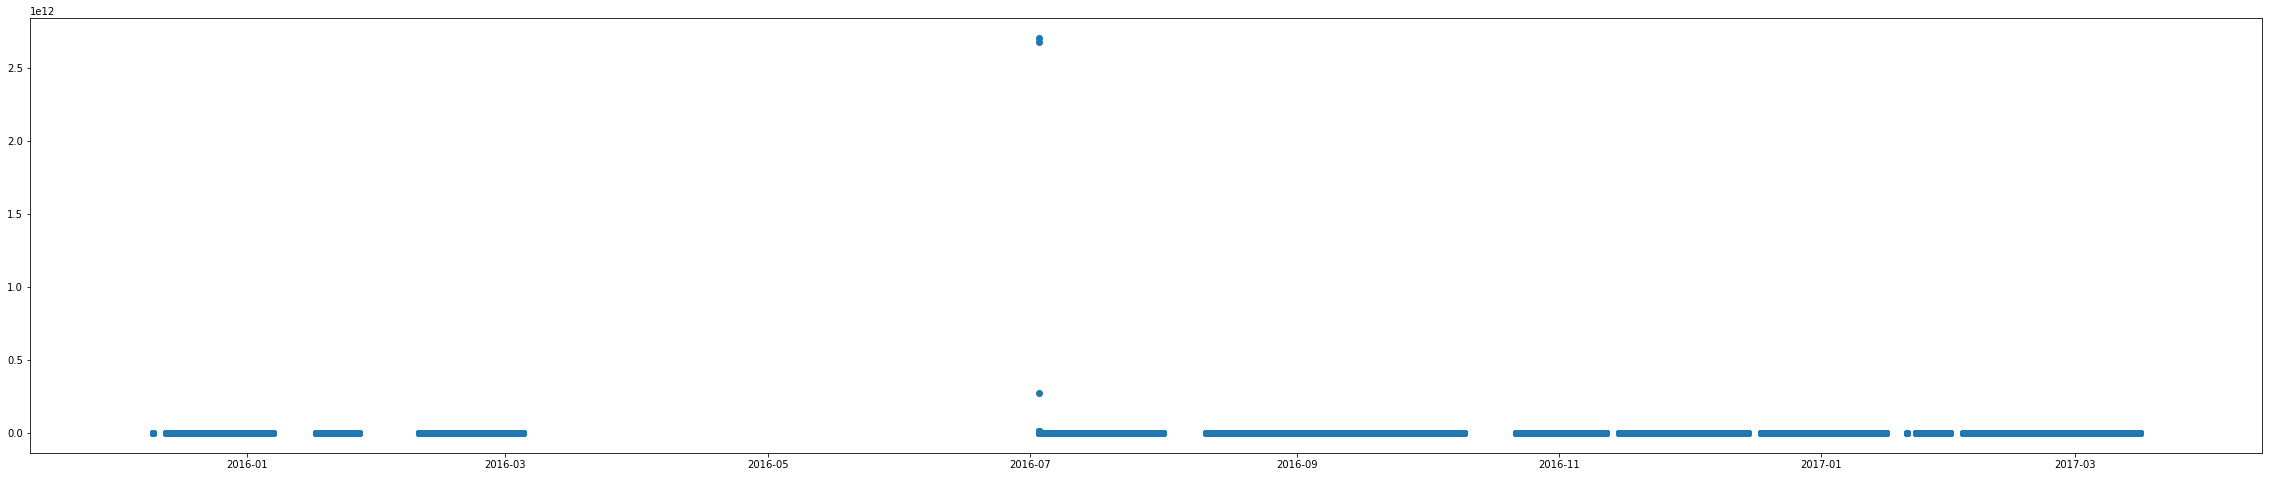

In [12]:
import matplotlib
b = data[['date_last_seen','price_eur']]
b['date_last_seen'] = pd.to_datetime(b['date_last_seen'])
matplotlib.rcParams['figure.figsize']= (40,8)
plt.scatter(b['date_last_seen'], b['price_eur'])

### Working with missing values

Let's drop `color_slug` because it contains more missing values. Also, let's make assumption that it wont hamper to our model

In [14]:
new_data = data.drop(['color_slug'], axis=1)
new_data.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,None,man,5,7,diesel,2015-11-14,2016-01-27,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,None,man,5,5,diesel,2015-11-14,2016-01-27,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,None,man,5,5,diesel,2015-11-14,2016-01-27,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,None,man,5,5,gasoline,2015-11-14,2016-01-27,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,None,man,5,5,gasoline,2015-11-14,2016-01-27,2738.71


Let's check variable `door_count` and `seat_count`

In [16]:

print("Unique values of door_Count:", new_data['door_count'].unique())
print("************************************")
print("Unique values of seat_Count:", new_data['seat_count'].unique())

Unique values of door_Count: ['5' '3' '4' 'None' '2' '6' '1' '7' nan 5.0 4.0 3.0 2.0 6.0 1.0 9.0 7.0
 8.0 77.0 58.0 54.0 0.0 55.0 22.0 45.0 17.0 49.0]
************************************
Unique values of seat_Count: ['7' '5' '4' 'None' '6' '9' '8' '2' '3' '1' '18' '20' '10' '11' '15' '12'
 '16' '14' '50' '17' '74' '65' '19' '54' '13' '27' '45' '24' '56' '22'
 '255' '23' '57' '25' nan 5.0 3.0 4.0 2.0 7.0 8.0 6.0 9.0 23.0 1.0 51.0
 12.0 15.0 14.0 55.0 19.0 61.0 21.0 13.0 17.0 20.0 10.0 11.0 18.0 45.0
 27.0 53.0 26.0 56.0 58.0 25.0 30.0 36.0 54.0 24.0 16.0 57.0 74.0 50.0 0.0
 29.0 52.0 32.0 44.0 512.0 33.0 515.0 59.0 85.0 517.0 81.0 43.0 49.0 138.0]


We got 'None' as one unique value in both variables. That may the mistake during entry. So, we will do 

1. Change 'None' value to nan
2. Then convert dtype from object to float i.e numeric.

In [17]:
new_data['door_count'] = new_data['door_count'].replace('None', np.nan).astype(float)
new_data['seat_count'] = new_data['seat_count'].replace('None', np.nan).astype(float)

door_count medina grda 4 , mode garda 5. seat_count both ma 5 so median nai garam.

In [19]:
new_data['seat_count'].fillna(new_data['seat_count'].mode()[0], inplace=True)
new_data['door_count'].fillna(new_data['door_count'].mode()[0], inplace=True)

In [20]:
# Statistics of numerical data
new_data.describe(percentiles = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9,1])
# data.describe()

,mileage,manufacture_year,engine_displacement,engine_power,door_count,seat_count,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06,3.552912e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,4.036171e+00,4.916900e+00,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,8.255923e-01,9.703929e-01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e-02
0%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e-02
10%,1.000000e+01,2.000000e+03,1.198000e+03,5.200000e+01,3.000000e+00,4.000000e+00,1.295340e+03
20%,1.000000e+04,2.003000e+03,1.390000e+03,6.600000e+01,4.000000e+00,5.000000e+00,1.295340e+03
30%,2.700000e+04,2.005000e+03,1.560000e+03,7.400000e+01,4.000000e+00,5.000000e+00,2.183570e+03
40%,5.690000e+04,2.007000e+03,1.598000e+03,8.000000e+01,4.000000e+00,5.000000e+00,4.441150e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,4.000000e+00,5.000000e+00,7.364910e+03


This statistics show that data contains lots of outliers. 
For example, on 9th and 10th quantile, value of `door_count` and `seat_count` are vast different.

For `transmission` variable

In [21]:
new_data['transmission'].mode()[0]

'man'

In [23]:
data['transmission'].isnull().sum()

741630

In [ ]:
medium_value = data.pivot_table(values = 'engine_power', 
                               index = [ 'maker', 'model'], aggfunc = np.median)
medium_value

In [ ]:
data['engine_power']= data['engine_power'].fillna(data.groupby(['maker','model'])['engine_power'].transform('median'))
#Null value on remaining tuples
data.apply(lambda x: sum(x.isnull()))

In [ ]:
data['engine_power']= data['engine_power'].fillna(data.groupby(['model'])['engine_power'].transform('median'))
#Null value on remaining tuples
data.apply(lambda x: sum(x.isnull()))

In [ ]:
missing = data.loc[data['engine_power'].isnull()].index
df_1.drop(missing, inplace = True)
print("Remaining no. of tuples are:",len(df_1))
df_1.apply(lambda x: sum(x.isnull()))

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.distplot(data.loc[data['transmission']=='auto']['price_eur'], kde = True, hist = False, color = 'red', ax = ax)
sns.distplot(data.loc[data['transmission']=='man']['price_eur'], kde = True, hist = False, color = 'green', ax = ax)
a = data.fillna( value= {'transmission':'man'})
sns.distplot(a.loc[a['transmission']=='man']['price_eur'], kde = True, hist = False, color = 'blue', ax = ax)


In [ ]:
plt.figure(figsize = (30, 15))
sns.catplot(x="body_type", y="price_eur",  data=data, )

In [ ]:
# Let's define a function which for plotting price of car with respect to other columns.
# Here we will plot total price, average price and count of occurence of sales based on particular feature of each column.
def plot_of_price_vs_other(df, value, index, title):
    a = data.pivot_table(values = value, index = index, aggfunc = [np.sum, np.mean, len])
    fig, axes = plt.subplots(3,1)
    fig.suptitle(title)
    a['sum'].plot(kind = 'bar', ax= axes[0], title = "Plot by total price", figsize = (12,10), sharex = True, sharey = True)
    a['mean'].plot(kind = 'bar', ax= axes[1], title= 'Plot by mean')
    a['len'].plot(kind = 'bar', ax = axes[2], title = 'Plot by count')
    
plot_of_price_vs_other(data, 'price_eur', 'seat_count', "Plot of seat_count_vs price")    

In [ ]:
plot_of_price_vs_other(data, 'price_eur', 'fuel_type', "Plot of fuel_type vs price") 

In [ ]:
plot_of_price_vs_other(data, 'price_eur', 'body_type', "Plot of body_type vs price") 

In [ ]:
plot_of_price_vs_other(data, 'price_eur', 'model', "Plot of model vs price") 

### Correlation

Let's see correlation plot between numerical variables

In [ ]:
correlation = data.corr()
sns.heatmap(data = correlation, annot = True)

Let's see how other features are correlated with our desired output feature: `price_eur`.


In [ ]:
correlation['price_eur'].sort_values(ascending = False)

In [ ]:
fig, ax = plt.subplots(7,1, figsize = (18, 26))
fig.suptitle("Histogram plot of different numerical feature.")
data.hist(bins = 'auto', ax = ax, grid = False , color='#19bf82')

In [ ]:
data.drop(['date_created', 'date_last_seen', 'color_slug'], axis=1, inplace=True)

In [ ]:
data['seat_count'].unique()
# data.seat_count.value_counts

In [ ]:
data['door_count'] = data['door_count'].replace('None', np.nan).astype(float)
data['seat_count'] = data['seat_count'].replace('None', np.nan).astype(float)

In [ ]:
data['maker'].isnull().sum()

door_count medina grda 4 , mode garda 5. seat_count both ma 5 so median nai garam.

In [ ]:
data['seat_count'].fillna(data['seat_count'].mode()[0], inplace=True)
data['door_count'].fillna(data['door_count'].mode()[0], inplace=True)

Univariate Plot of variables seat and door count

In [ ]:
data.seat_count.hist()


In [ ]:
data.door_count.hist()

In [ ]:
data.mileage

In [ ]:
data["mileage"] = data.groupby("maker")['mileage'].transform
(lambda x: x.fillna(x.median()))
data["engine_power"] = data.groupby("maker")['engine_power'].transform
(lambda x: x.fillna(x.median()))

In [ ]:
data.isnull().mean()

In [ ]:
import missingno as mno

In [ ]:
mno.matrix(df, figsize=(20,6))

In [ ]:
df['door_count'].unique()

In [ ]:
df['door_count'].replace('None', 0, inplace=True)

In [ ]:
df['door_count'] = df['door_count'].astype(float)

In [ ]:
df['maker'].fillna(df['maker'].mode()[0], inplace=True)


In [ ]:
missing_columns = ['mileage', 'manufacture_year', 'engine_power',
                  'door_count']

In [ ]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values,
                                                                          number_missing,
                                                                          replace = True)
    
    return df

In [ ]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [ ]:
df = df[['mileage', 'manufacture_year', 'engine_power',
        'price_eur', 'door_count']]
df.head(5)

In [ ]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]


In [ ]:
df["manufacture_year"] = df.groupby("maker")['manufacture_year'].transform(lambda x: x.fillna(x.median()))
df["mileage"] = df.groupby("maker")['mileage'].transform(lambda x: x.fillna(x.median()))
df["engine_power"] = df.groupby("maker")['engine_power'].transform(lambda x: x.fillna(x.median()))


In [ ]:


df['door_count'].unique()



In [ ]:
df['door_count']

In [ ]:
df['door_count'].fillna(float(int(df['door_count'].mode())), inplace=True)

In [ ]:
for cols in df:
    if df[cols].dtypes == 'object':
        df[cols].astype('str')
        print(df[cols].value_counts())

In [ ]:
sns.boxplot(y=df['date_last_seen'])

In [ ]:
df.hist(figsize=(20,15))